In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X,y = data.data, data.target
df= pd.DataFrame(X, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Here we use PCA to remove colinearity. Can be used for many purposes, which makes it very versatile.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()

print(X_train.shape)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Output: 30 parameters
pca = PCA(n_components=scaled_X_test.shape[1])
pca_transform = pca.fit_transform(scaled_X_train)



(381, 30)


In [6]:
# Variance of the principal components (the first explain 43% of the variance, the second 20% and so on.)
pca.explained_variance_ratio_

array([4.32034362e-01, 1.98534750e-01, 9.80816513e-02, 6.50031120e-02,
       5.15098214e-02, 4.20420694e-02, 2.26471250e-02, 1.69757997e-02,
       1.29754455e-02, 1.21150953e-02, 1.04047339e-02, 8.82553474e-03,
       8.05898859e-03, 5.11718469e-03, 2.79727033e-03, 2.26321052e-03,
       1.97300147e-03, 1.78954632e-03, 1.66253597e-03, 1.05243069e-03,
       9.08690423e-04, 8.84491302e-04, 7.45627005e-04, 5.61952738e-04,
       4.98462201e-04, 2.39315567e-04, 2.19303624e-04, 4.93040172e-05,
       2.53610171e-05, 3.82323987e-06])

Above we see that we could cut all but the first six features or so.

In [8]:
import numpy as np
proportion_explained = np.cumsum(pca.explained_variance_ratio_)
print(proportion_explained)

[0.43203436 0.63056911 0.72865076 0.79365388 0.8451637  0.88720577
 0.90985289 0.92682869 0.93980414 0.95191923 0.96232397 0.9711495
 0.97920849 0.98432567 0.98712294 0.98938615 0.99135916 0.9931487
 0.99481124 0.99586367 0.99677236 0.99765685 0.99840248 0.99896443
 0.99946289 0.99970221 0.99992151 0.99997082 0.99999618 1.        ]


[Text(0.5, 1.0, 'Knee plot for PVE'),
 Text(0.5, 0, 'Number of PCs used'),
 Text(0, 0.5, 'Proportion of Variance Explained')]

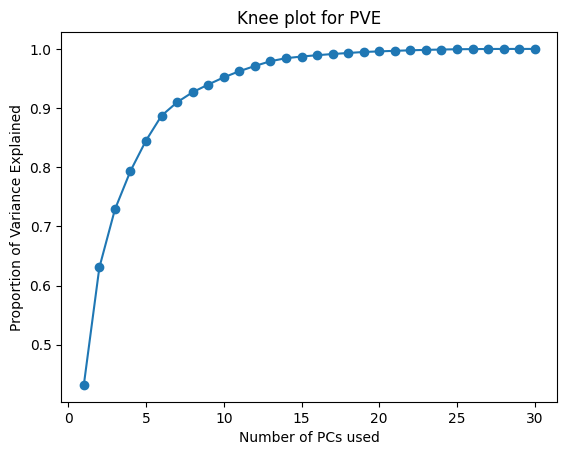

In [10]:
import matplotlib.pyplot as plt

ax = plt.axes()

ax.plot(range(1,31), proportion_explained, "-o")
ax.set(title="Knee plot for PVE", xlabel="Number of PCs used", ylabel="Proportion of Variance Explained")

For every additional PC used the computational resources are squared, so we want to keep it to a minimum. Maybe 5 would suffice?

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

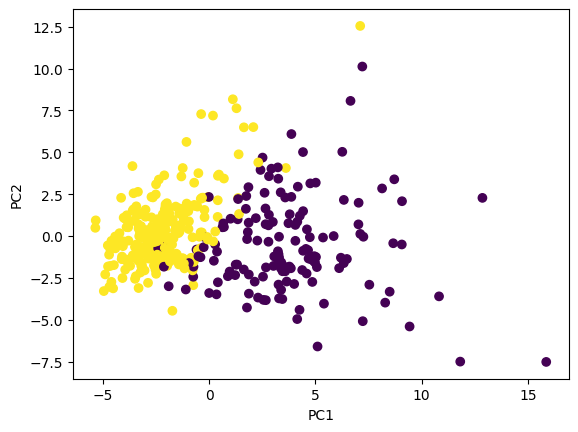

In [11]:
ax = plt.axes()
ax.scatter(pca_transform[:,0], pca_transform[:,1], c=y_train)
ax.set(xlabel="PC1", ylabel="PC2")

We wee a pretty good separation of the first two principal parameters

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.svm import SVC

def evaluate_model(model, title=""): 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()
    plt.title(title)

pipe_PCA = Pipeline([("scaling", StandardScaler()), ("dim_red", PCA(n_components=10)), ("svm", SVC(kernel= "linear"))])
pipe_no_PCA = Pipeline([("scaling", StandardScaler()), ("svm", SVC(kernel= "linear"))])

kernel = 'rbf' (radial basis function) didn't perform better

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



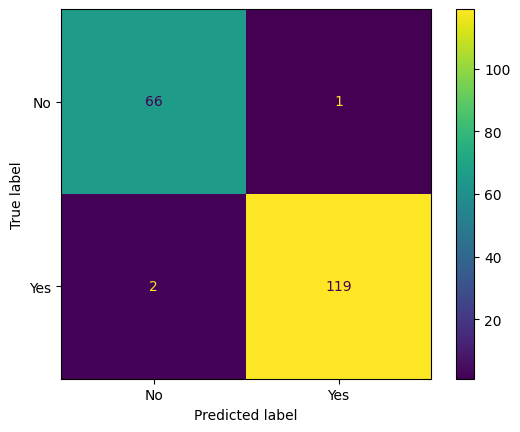

In [25]:
evaluate_model(pipe_PCA)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



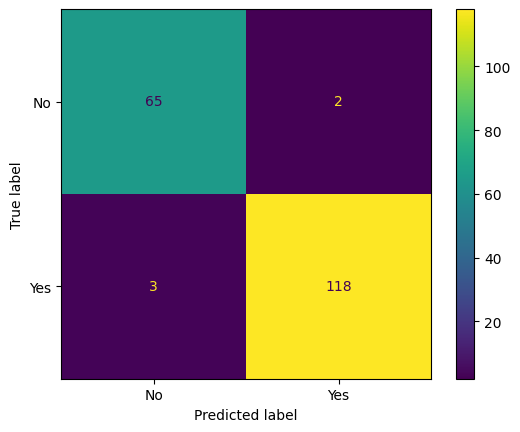

In [26]:
evaluate_model(pipe_no_PCA)

PCA gives better results classifying these two features.